In [2]:
import ROOT as r
import math
from BlindersPy3 import Blinders    #from the g-2 blinding software. 
                                    #Download link: https://cdcvs.fnal.gov/redmine/projects/gm2analyses/wiki/Library_installation
from BlindersPy3 import FitType

getBlinded = Blinders(FitType.Omega_a, 'memes')

 + ++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++ +
 +                                                                      +
 +           You have chose to blind your fitting according to          +
 +                omega_ref * (1 + (R +/- deltaR) *10^{-6})             +
 +                                                                      +
 + ++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++ +


In [54]:
chain = r.TChain("farline/eventTree")
chain.Add("./9day/gm2offline_ana_233128_16528.00035.root")
chain.Add("./9day/gm2offline_ana_233130_16535.00353.root")
chain.Add("./9day/gm2offline_ana_233134_16482.00307.root")
chain.Add("./9day/gm2offline_ana_233136_16528.00161.root")

In [75]:
h = r.TH2D("h", "Wiggle Plot; Time [#mus]; Energy [MeV]", 10000, 0, 700, 600, 0, 6000)
chain.Draw("energy:time*1.25/1000.>>h", "energy < 6000", "goff")

185534104

The history saving thread hit an unexpected error (OperationalError('disk I/O error')).History will not be written to the database.


Warning in <TROOT::Append>: Replacing existing TH1: h (Potential memory leak).


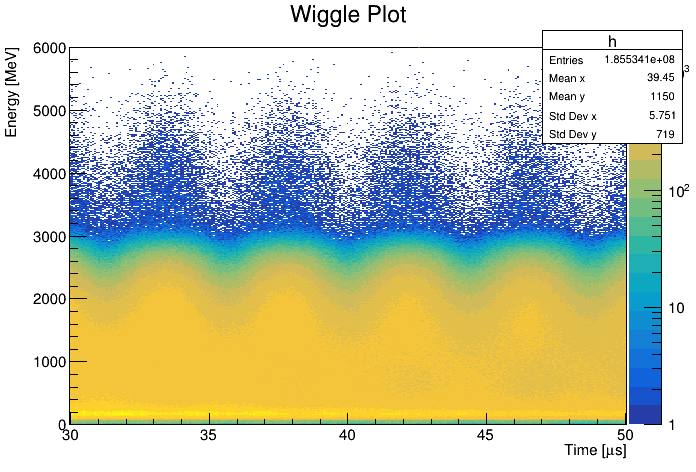

In [76]:
c = r.TCanvas()
h.Draw("colz")
h.GetXaxis().SetRangeUser(30,50)
c.SetLogz()
c.Draw()

In [84]:
eLow = 1700
eHigh = 6000

binLow = h.GetYaxis().FindBin(eLow)
binHigh = h.GetYaxis().FindBin(eHigh)

h.GetXaxis().SetRangeUser(0,700)
h2 = h.ProjectionX("_px", binLow, binHigh).Clone("h2")
h2.GetYaxis().SetTitle("N / 148.9 ns")

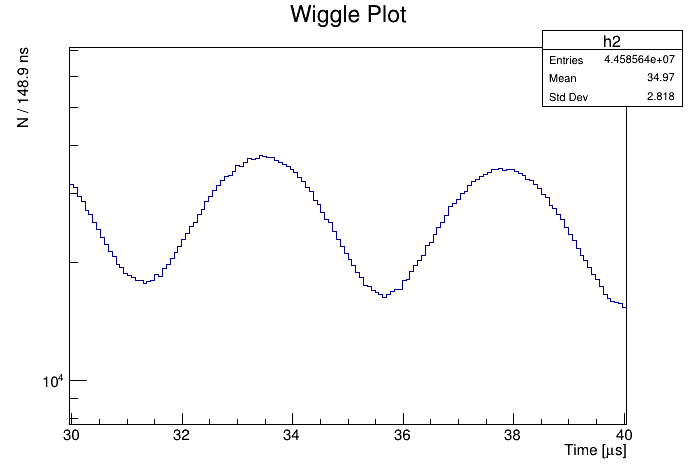

In [85]:
c = r.TCanvas()
h2.Draw("colz")
h2.GetXaxis().SetRangeUser(30,40)
c.SetLogy()
c.Draw()

In [86]:
def blinded_wiggle(x, p):
    norm = p[0]
    life = p[1]
    asym = p[2]
    R = p[3]
    phi = p[4]
    
    time = x[0]
    omega = getBlinded.paramToFreq(R)
    
    return norm * math.exp(-time/life) * (1 - asym*math.cos(omega*time + phi))

In [95]:
func = r.TF1("func", blinded_wiggle, 30, 600, 5)
func.SetParNames('N', '#tau', 'A', 'R( #omega_{a} )', '#phi')
func.SetParameters(4500, 64.4, 0.4, 0, 5.2)

 FCN=849.006 FROM MINOS     STATUS=SUCCESSFUL     36 CALLS         341 TOTAL
                     EDM=1.0863e-06    STRATEGY= 1      ERROR MATRIX ACCURATE 
  EXT PARAMETER                                   STEP         FIRST   
  NO.   NAME      VALUE            ERROR          SIZE      DERIVATIVE 
   1  N            4.58466e+04   4.66732e+01  -4.12439e-02  -1.58991e-07
   2  #tau         6.41860e+01   7.80081e-02   6.10592e-05  -7.82470e-05
   3  A            3.70169e-01   3.52625e-04  -1.91719e-07  -4.50618e-05
   4  R( #omega_{a} )  -6.81341e+01   4.83653e+01   3.12678e-03   1.57123e-07
   5  #phi         5.22476e+00   3.72529e-03   3.72529e-03  -1.77830e-03


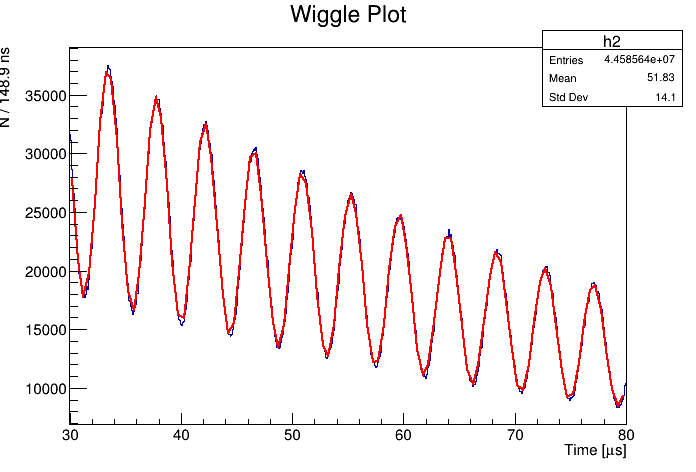

In [98]:
c = r.TCanvas()
h2.Draw()
h2.GetXaxis().SetRangeUser(30,80)
h2.Fit("func", 'REM')
c.Draw()